In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

# Preprocessing Data

## load

In [3]:
# %reset_selective -f [data]


In [4]:
data1 = datasets.MNIST('', download=True)

In [5]:
data1

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train

In [35]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


`batch_size` = split dataset to 10 part; and feed them seperately to the model.(train 10 seperately model)

Make the optimazation more general.    
Also, large batch size help decrease training time


`shuffle` give everything to NN; to get the general role

In [36]:

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


## see data

In [9]:
# iterate once 
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

> the first part is digits; the second part is tensors

In [10]:
# make sure
x = data[0][0] # the first set of obs; the first digit
y = data[1][0]

print(y)

tensor(5)


**why there is a 1?**

In [11]:
print(x.shape)

torch.Size([1, 28, 28])


In [12]:
import matplotlib.pyplot as plt


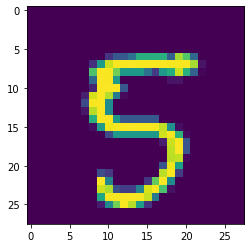

In [13]:
sample3 = data[0][0].view(28,28) # have to reshape it 
plt.imshow(sample3)

## balance the data

why balance is so important?    

### check if it is balanced

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Y = data[1]
    for y in Y:
        counter_dict[int(y)] += 1
        total += 1

        


In [15]:
for i in counter_dict:
    print(f'{i}:  {(counter_dict[int(i)]/total*100):2f}%')

0:  9.871667%
1:  11.236667%
2:  9.930000%
3:  10.218333%
4:  9.736667%
5:  9.035000%
6:  9.863333%
7:  10.441667%
8:  9.751667%
9:  9.915000%


# Built model

they are very similar; for different types of code style

In [41]:
import torch.nn as nn # more O-O-P
import torch.nn.functional as F # Just functions

[nn.Linear](https://pytorch.org/docs/master/generated/torch.nn.Linear.html) is fully connected NN;    
[nn.conv](https://pytorch.org/docs/master/generated/torch.nn.Conv1d.html)   is convolutional NN

built a [forward NN](https://pytorch.org/docs/master/generated/torch.nn.Module.html)
 ; template and documentation here

[softmax](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)

There you could find, `softmax` gives you prob, which is usually the **last layer**

![a typical framework of NN](https://miro.medium.com/max/1400/1*czt98NR7yXV6tdnJ0j7vBw.png)

What is `super()`?    
Super is a function, which return the proxy object of the superclass(es).            If this class is inherited from multiple super classes; **Only the method of the first inherited parent class** will be called(Otherwise, you have to call them manually)

In [33]:
class Net(nn.Module):  # inherit from nn.Module
    
    def __init__(self):
        super().__init__() 
        # super() is a func return super class
        # .init()  we could refer any func of superclass we refer to
        self.fc1 = nn.Linear(28*28, 64) # define 1st fully connected NN
        '''
        layer 1:
        input: flatten image: 28*28
        output: the numebr of Nerual of each layer; 64 nerual each layer
        '''                
        self.fc2 = nn.Linear(64, 64)
        '''
        layer 2:
        input: must be 64
        output: whatever you like
        '''
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        '''
        last NN, output must be 10 (10 final output digits)
        
        '''
        
        
    
    '''
    the method how data would flow through NN
    this time, forward
    '''
    def forward(self, x):
        '''
        x is gonna pass through all the layers
        F.relu,  activation func we picked up (it could be anything else)
        '''
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
                            # why dim =1? (dim=1, column)
                            # which axis contains all the RVs of the discrete distribution 
            
            
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### test our NN

In [34]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)  # X must be flatten(reshape) at first
# bcz our input is 28*28, 1

# -1； auto

print(X.shape)
net = Net()
print(net)
print(try_test) # predictions

torch.Size([1, 784])
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
tensor([[-2.2142, -2.3873, -2.4059, -2.3408, -2.2594, -2.3725, -2.1144, -2.2837,
         -2.3065, -2.3799]], grad_fn=<LogSoftmaxBackward>)


# Train 

Two important part here:
1. Loss
2. Optimizer

In [44]:
import torch.optim as optim

Adam takes two paras
1. parameters, which correspond everything that are adjustable (not necessarily to be all paras; E.g. When transfer learning, **you could freeze** some upper layers to generally extract info, and modify deeper layers to specify)    
2. Learning rate;ideally, getting smaller when closer to optimization

In [21]:
loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

`Epochs`: a full pass through the data

In [24]:
EPOCHS = 3  # 3 whole pass

#### understand inner var

In [45]:
# test

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data # X, y 1 batch 
        print(X[0]) # only 1 number and graphic
        print(y[0])
    
        break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [26]:
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data # X, y 1 batch 
        print(X) # only 1 number and graphic
        print(y)
    
        break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

> Clearly, X,y is a batch of trainingset; each batch contains 10 numbers; 

#### real train

 
 `zero_grad`
 
 everytime before pass the data into NN;    
 everytime calculate the Loss and gredient to get optimization;

Why `batch`?   
32~164    
1. decrease training time
2. help generalize

Two way to cal loss:
1. One-hot vector (generally, MSE)
2. Scalar :nll_loss (this case)

In [55]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [56]:
#%reset
# this is a complete version of code
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss) 

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(0.0628, grad_fn=<NllLossBackward>)
tensor(0.0295, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)


> Training on trainset, Going down is a good sign

output: each batch, 10 list, each element is a list contains the prob being 0~9.

# Test

## accuracy

`no_grad`: These are testing data. Do not cal gradients here!

In [57]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.972


## Visually Check our model

### what is the output of net instance(Net Object)?

In [65]:
net(X[0].view(-1, 28*28))

tensor([[-2.2874e+01, -1.2761e+01, -1.0938e+01, -9.2062e+00, -1.9057e+01,
         -1.5971e+01, -2.9663e+01, -1.2254e-04, -1.4006e+01, -1.4391e+01]],
       grad_fn=<LogSoftmaxBackward>)

> output is a tensor containing the probs of all possible numbers

In [66]:
print(torch.argmax(  net(X[0].view(-1, 28*28))  )) # max is the result

tensor(7)


### visually check

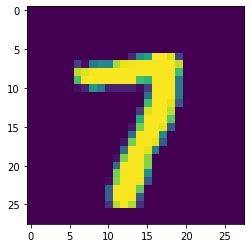

tensor(7)


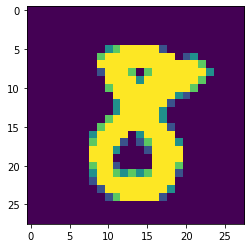

tensor(8)


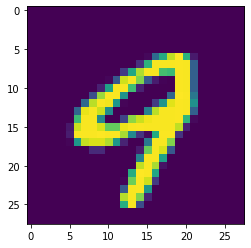

tensor(9)


In [68]:
import matplotlib.pyplot as plt

check_n = 3

for i in range(check_n):
    plt.imshow(X[i].view(28,28))  # a tensor(array); back to image
    plt.show()
    print(torch.argmax(  net(X[i].view(-1, 28*28))  ))  
    # use our model to make a predict
    # net func back two 

> performed perfectly nice